In [ ]:
! nvidia-smi

Thu Dec  3 01:52:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Python Basic

In [ ]:
a = 3
b = 2
a + b

5

## Decision Tree

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.data[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree.export_graphviz(clf,'tree.dot')

In [ ]:
! cat tree.dot

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
4 -> 6 ;
7 [label="X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
7 -> 8 ;
9 [label="X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsampl

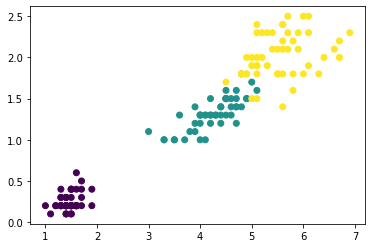

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(iris.data[:,2], iris.data[:,3], c = iris.target)

## Decision Tree Boundary

In [ ]:
X = iris.data[:, [2,3]]
y = iris.target

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth= 2)
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

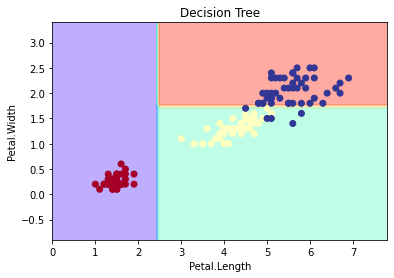

In [ ]:
import numpy as np
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()



## Logisitc Regression

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 300 )
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
X = iris.data[:, [2,3]]
y = iris.target

In [25]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

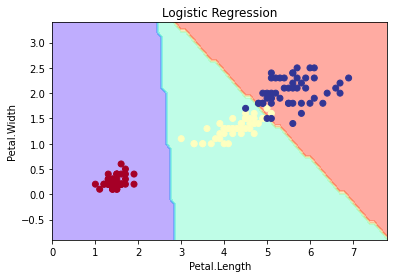

In [27]:
import numpy as np
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()



## Activation Function

In [29]:
def threshold_function(x):
  y = x > 0
  return y.astype(int)

import numpy as np
threshold_function(np.array([-1,1,2]))

array([0, 1, 1])

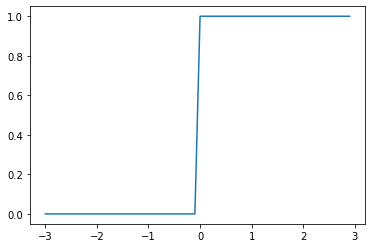

In [30]:
x = np.arange(-3,3,0.1)
plt.plot(x, threshold_function(x))

In [31]:
def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))


In [32]:
x = np.array([-1,1,2])
sigmoid_function(x)

array([0.26894142, 0.73105858, 0.88079708])

In [35]:
x = np.array([-1,1,2,5,6])
sigmoid_function(x)

array([0.26894142, 0.73105858, 0.88079708, 0.99330715, 0.99752738])

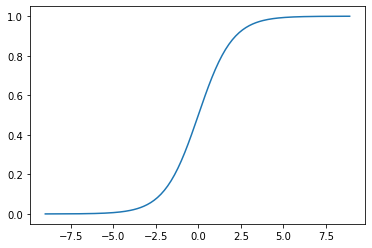

In [34]:
s = np.arange(-9,9,0.1)
plt.plot(s, sigmoid_function(s))

In [36]:
def tangent_function(x):
    return (1 - np.exp(-2*x)) / (1 + np.exp(-2*x))

x = np.array([-1,1,2])
tangent_function(x)


array([-0.76159416,  0.76159416,  0.96402758])

In [37]:
np.tanh(x)

array([-0.76159416,  0.76159416,  0.96402758])

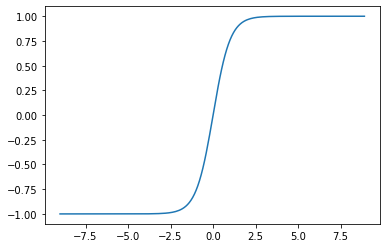

In [38]:
s = np.arange(-9,9,0.1)
plt.plot(s, np.tanh(s))

In [39]:
def relu_function(x):
    return np.maximum(0,x)

x = np.array([-1,1,2])
relu_function(x)


array([0, 1, 2])

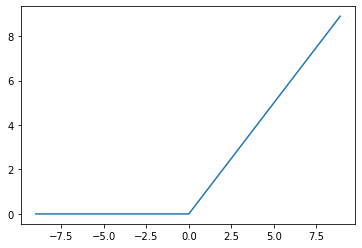

In [40]:
s = np.arange(-9,9,0.1)
plt.plot(s, relu_function(s))

## Neural Network

In [41]:
import numpy as np
X = np.array([1,2])
W = np.array([[1,3,5],
              [2,4,6]])

In [43]:
X.shape

(2,)

In [44]:
W.shape

(2, 3)

In [46]:
a = np.dot(X,W)
a

array([ 5, 11, 17])

In [47]:
a1 = sigmoid_function(a)

In [48]:
a1

array([0.99330715, 0.9999833 , 0.99999996])

In [49]:
W2 = np.array([[1,2],[3,4],[5,6]])

In [50]:
np.dot(a1, W2)

array([ 8.99325684, 11.98654724])

In [51]:
network = {}
network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
network['b1'] = np.array([0.1,0.2,0.3])
network['w2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
network['b2'] = np.array([0.1,0.2])


In [52]:
x = np.array([1,0.5])


In [53]:
a = np.dot(x, network['w1']) + network['b1']

In [54]:
a

array([0.3, 0.7, 1.1])

In [55]:
z = sigmoid_function(a)
z

array([0.57444252, 0.66818777, 0.75026011])

In [57]:
y = np.dot(z, network['w2']) + network['b2']

In [58]:
y

array([0.51615984, 1.21402696])

In [59]:

def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

y = np.array([-1,1,2])
softmax_function(y)


array([0.03511903, 0.25949646, 0.70538451])

In [60]:
def mean_squared_err(y_hat, y):
    return 0.5 * np.sum((y_hat - y) ** 2)


In [61]:
def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))
